In [1]:
library(rethinking)
#options(repr.plot.width = 1, repr.plot.height = 0.75)

Loading required package: rstan
Warning message:
"package 'rstan' was built under R version 3.3.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.3.2"rstan (Version 2.13.2, packaged: 2016-12-18 07:04:42 UTC, GitRev: 5fa1e80eb817)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.59)


In [2]:
data(foxes)

In [3]:
Fx <- foxes

In [4]:
Fx$avgfood.s <- (Fx$avgfood - mean(Fx$avgfood))/sd(Fx$avgfood)
Fx$groupsize.s <- (Fx$groupsize - mean(Fx$groupsize))/sd(Fx$groupsize)
Fx$area.s <- (Fx$area - mean(Fx$area))/sd(Fx$area)
Fx$weight.s <- (Fx$weight - mean(Fx$weight))/sd(Fx$weight)

In [5]:
head(Fx)

group,avgfood,groupsize,area,weight,avgfood.s,groupsize.s,area.s,weight.s
1,0.37,2,1.09,5.02,-1.924829,-1.524089,-2.239596,0.4141347
1,0.37,2,1.09,2.84,-1.924829,-1.524089,-2.239596,-1.4270464
2,0.53,2,2.05,5.33,-1.118035,-1.524089,-1.205508,0.6759540
2,0.53,2,2.05,6.07,-1.118035,-1.524089,-1.205508,1.3009421
3,0.49,2,2.12,5.85,-1.319734,-1.524089,-1.130106,1.1151348
3,0.49,2,2.12,3.25,-1.319734,-1.524089,-1.130106,-1.0807692


In [6]:
summary(Fx$area.s)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.24000 -0.62380 -0.04216  0.00000  0.64990  2.04800 

In [7]:
#(1) 
area.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b * area.s ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

area.seq<-seq(from=min(Fx$area.s) ,to=max(Fx$area.s) ,by=.5)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu <- link( area.Model , data=data.frame(area.s=area.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight <- sim( area.Model , data=data.frame(area.s=area.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [8]:
HPDI(samples = sim.weight, prob = c(.5, .89, .97))
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
1.829496 2.596106 3.578437 3.676426 2.682013 1.919724

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [9]:
mean(Fx$weight)
mean(sim.weight)

[1] 4.529655

[1] 4.51891

In [10]:
area.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
        a     sigma         b 
4.5296347 1.1786856 0.0230584 

Log-likelihood: -183.67 

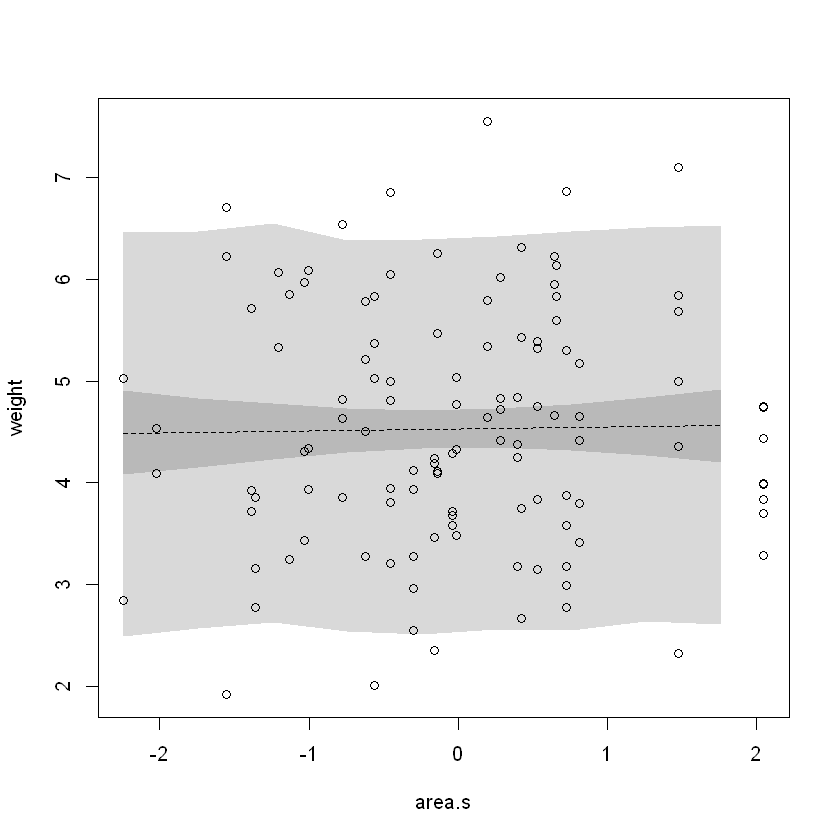

In [11]:
plot(weight~area.s, Fx)
lines(area.seq,apply( mu , 2 , mean ), lty=2)
shade(apply( sim.weight , 2 , HPDI, prob = 0.9 ),area.seq)
shade(apply( mu , 2 , HPDI, prob = 0.9 ),area.seq)

In [12]:
#(2) 
groupsize.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*groupsize.s ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

size.seq<-seq(from= min(Fx$groupsize.s),to= max(Fx$groupsize.s),by=.5)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu1 <- link( groupsize.Model , data=data.frame(groupsize.s=size.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight1 <- sim( groupsize.Model , data=data.frame(groupsize.s=size.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [13]:
HPDI(samples = sim.weight1, prob = c(.5, .89, .97))
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
2.253301 2.953568 4.105557 3.893738 2.921840 2.133857

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [14]:
mean(Fx$weight)
mean(sim.weight1)

[1] 4.529655

[1] 4.484575

In [15]:
groupsize.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * groupsize.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b 
 4.5296747  1.1635647 -0.1906151 

Log-likelihood: -182.17 

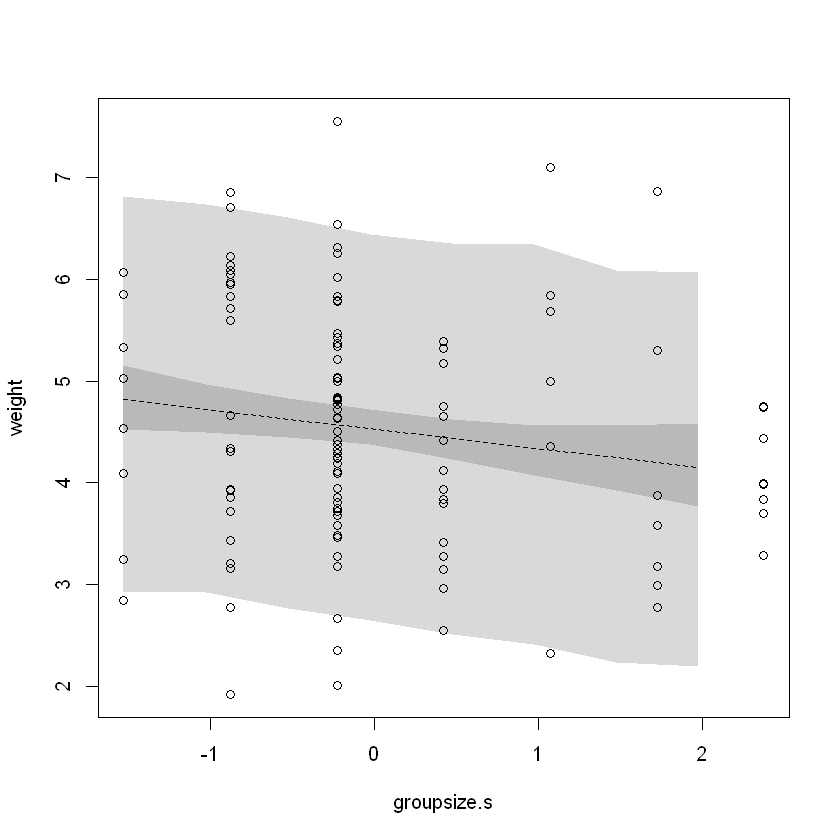

In [16]:
plot(weight~groupsize.s, Fx)
lines(size.seq,apply( mu1 , 2 , mean ), lty=2)
shade(apply( sim.weight1 , 2 , HPDI, prob = 0.9 ),size.seq)
shade(apply( mu1 , 2 , HPDI, prob = 0.9 ),size.seq)

In [17]:
#(1) 
Multi.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*area.s +b1*groupsize.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ,b1=0) )

In [18]:
Multi.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area.s + b1 * groupsize.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1 
 4.5296556  1.1184493  0.5734813 -0.6651597 

Log-likelihood: -177.58 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


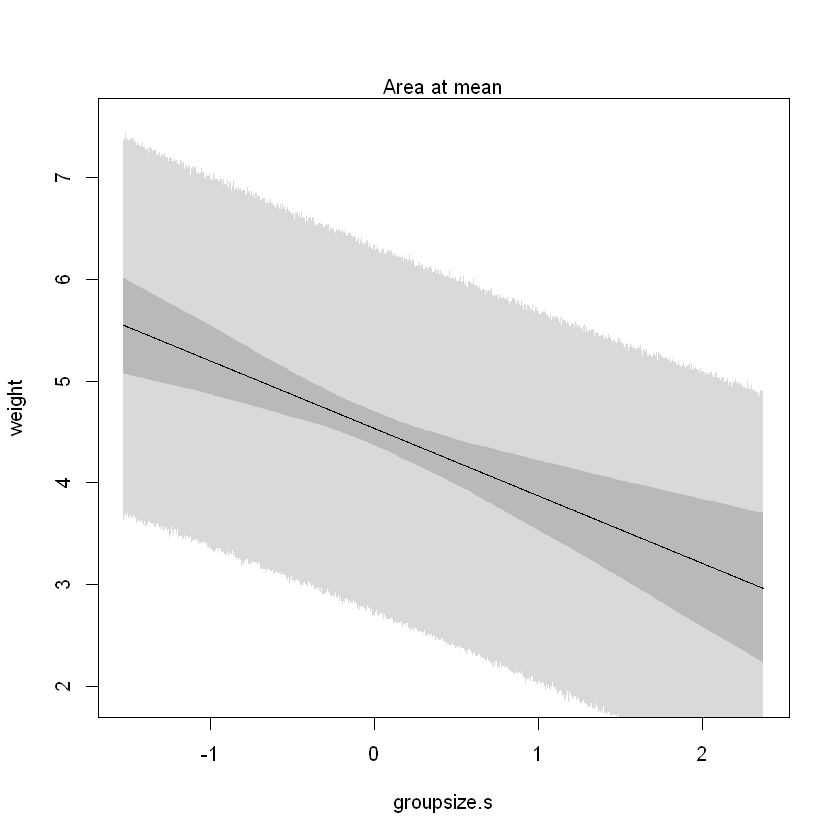

In [20]:
size.seq<-seq(from=min(Fx$groupsize.s),to=max(Fx$groupsize.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi <- link( Multi.Model , data=data.frame(groupsize.s=size.seq,area.s=mean(Fx$area.s) ) )
#Draw Prediction Simulations from posterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi <- sim( Multi.Model , data=data.frame(groupsize.s=size.seq, area.s=mean(Fx$area.s) ),   n=1e4  ) 
#display
plot(weight~groupsize.s, Fx , type="n")
mtext("Area at mean")
lines(size.seq , apply(mu.multi, 2, mean))
shade(apply( mu.multi , 2, PI) , size.seq  )
shade(apply( sim.weight.Multi , 2, PI) , size.seq  )

[ 1000 / 1000 ]
[ 10000 / 10000 ]


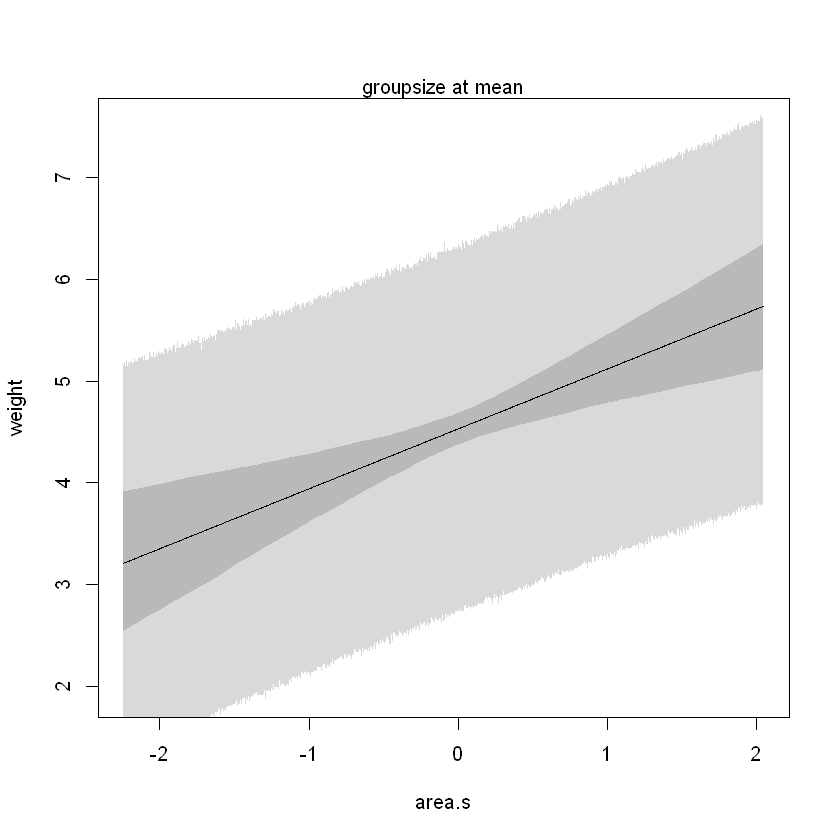

In [21]:
area.seq<-seq(from=min(Fx$area.s),to=max(Fx$area.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi2 <- link( Multi.Model , data=data.frame(groupsize.s=mean(Fx$groupsize.s),area.s=area.seq ) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi2 <- sim( Multi.Model , data=data.frame(groupsize.s=mean(Fx$groupsize.s), area.s=area.seq ),   n=1e4  ) 


Multi2.pi <- apply(sim.weight.Multi2 , 2 , PI)
#display
plot(weight~area.s, Fx , type="n")
mtext("groupsize at mean")
lines(area.seq , apply(mu.multi2, 2, mean))
shade(apply( mu.multi2 , 2, PI) , area.seq  )
shade(apply( sim.weight.Multi2 , 2, PI) , area.seq  )

In [37]:
Var.Model <- map( 
    alist( 
        area.s ~ dnorm( mu , sigma ),
        mu <- a + b*groupsize.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$area.s) , sigma=sd(Fx$area.s) , b=0 ) )

In [38]:
mu.v <- coef(Var.Model)['a'] + coef(Var.Model)['b']*Fx$groupsize.s
Area.residuals <- Fx$area.s - mu.v

In [39]:
# Need this in order to create interval around mu
mx <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*Area.residuals,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=data.frame(weight=Fx$weight,Area.residuals=Area.residuals) )

[ 1000 / 1000 ]


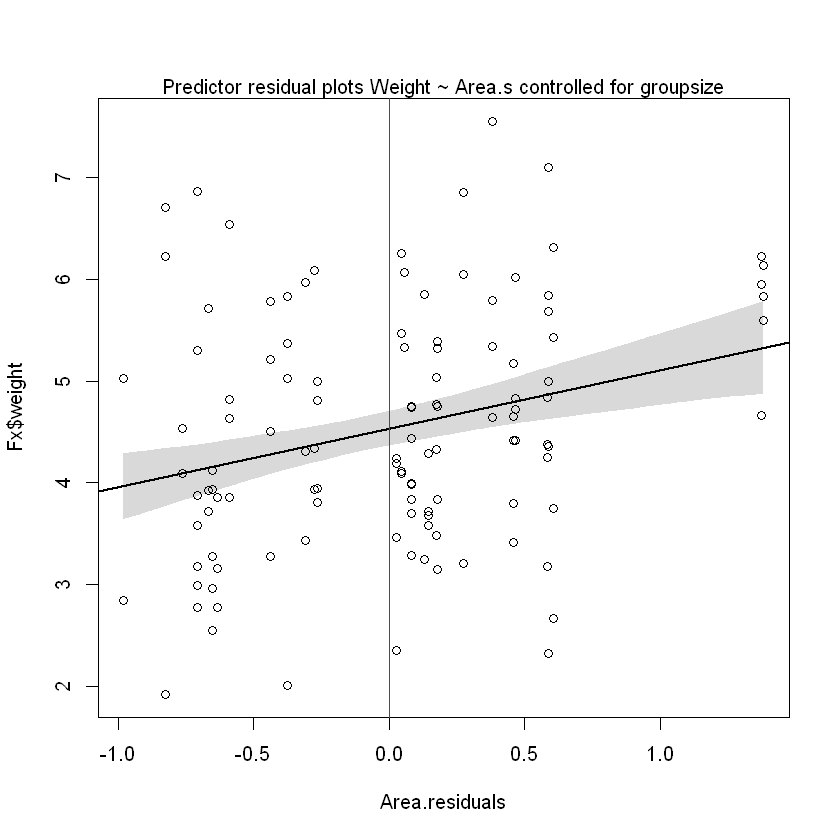

In [40]:
Area.resid.seq<-seq(from=min(Area.residuals),to=max(Area.residuals), length.out=1e3)
plot(Fx$weight~Area.residuals )
mtext("Predictor residual plots Weight ~ Area.s controlled for groupsize")
abline(lm(Fx$weight~Area.residuals ), lwd=2)
mu.varz <- link( mx , data=data.frame(Area.residuals=Area.resid.seq ) )
shade(apply( mu.varz , 2, PI) , Area.resid.seq  )
abline(v=0, col= "red")

In [41]:
Var.Model2 <- map( 
    alist( 
        groupsize.s ~ dnorm( mu , sigma ),
        mu <- a + b*area.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$groupsize.s) , sigma=sd(Fx$groupsize.s) , b=0 ) )

In [42]:
mu.v2 <- coef(Var.Model2)['a'] + coef(Var.Model2)['b']*Fx$area.s
groupsize.residuals <- Fx$groupsize.s - mu.v2

In [43]:
# Need this in order to create interval around mu
mx2 <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*groupsize.residuals,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=data.frame(weight=Fx$weight,groupsize.residuals=groupsize.residuals) )

[ 1000 / 1000 ]


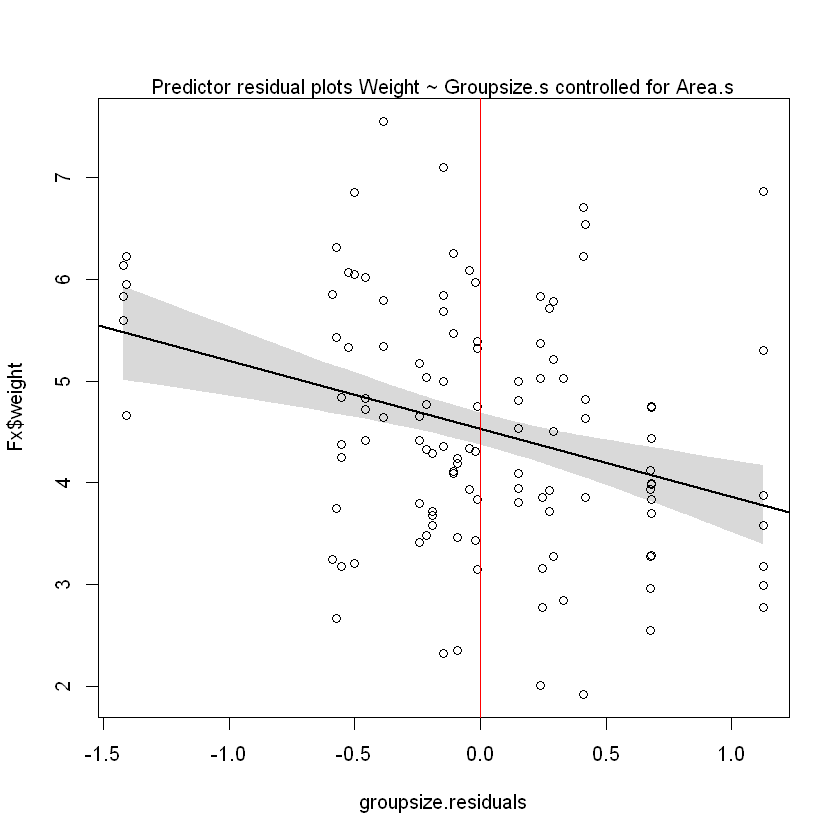

In [44]:
groupsize.residuals.seq<-seq(from=min(groupsize.residuals),to=max(groupsize.residuals), length.out=1e3)
plot(Fx$weight~groupsize.residuals )
mtext("Predictor residual plots Weight ~ Groupsize.s controlled for Area.s")
abline(lm(Fx$weight~groupsize.residuals ), lwd=2)
mu.varz2 <- link( mx2 , data=data.frame(groupsize.residuals=groupsize.residuals.seq ) )
shade(apply( mu.varz2 , 2, PI) , groupsize.residuals.seq  )
abline(v=0, col= "red")

In [47]:
#draw parameter samples from posterior using trained data
mu.fromsource <- link(Multi.Model)

#summarize samples across cases
mu.mean <- apply( mu.fromsource, 2 , mean)
mu.PI <- apply(mu.fromsource, 2, PI)

#predict/simulate observations
weight.sim3 <- sim(Multi.Model, n= 1e4)
weight.PI3 <-apply(weight.sim3, 2, PI)

[ 10000 / 10000 ]


integer(0)

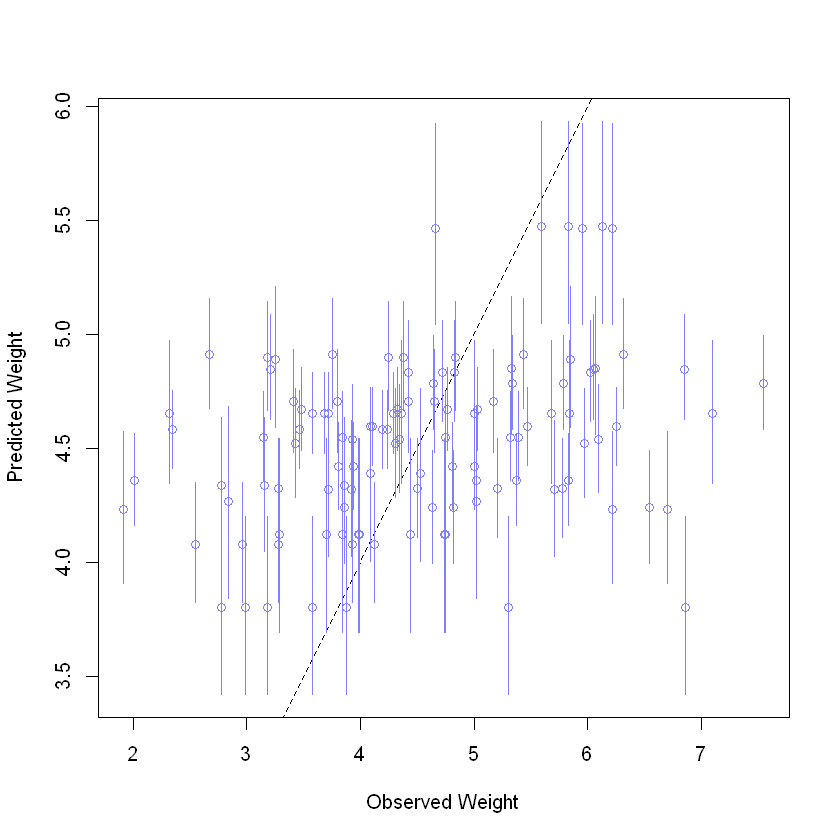

In [55]:
plot( mu.mean ~ Fx$weight , col=rangi2 , ylim=range(mu.PI) , xlab="Observed Weight" , ylab="Predicted Weight" )
abline( a=0 , b=1 , lty=2 )
for ( i in 1:nrow(Fx) ) 
    lines( rep(Fx$weight[i],2) , c(mu.PI[1,i],mu.PI[2,i]) ,
          col=rangi2 )
# doesnt work in jupyter identify(x=Fx$weight, y=mu.mean , labels = Fx$weight , cex = 0.8)

In [100]:
# predict(lm( weight.resid ~ Fx$avgfood.s),interval = c("confidence"), 
# level = 0.90,type="response")
#link( mx2 , data=data.frame(groupsize.residuals=groupsize.residuals.seq ) )
length(apply( mu.varz2 , 2, PI))
length(groupsize.residuals.seq)
length(apply( mu.mu , 2, PI))
length(newx)
length(apply( mu.varz2 , 2, PI))
length(groupsize.residuals.seq  )
dim(link(newvar))


[1] 2000

[1] 1000

[1] 400

[1] 200

[1] 2000

[1] 1000

[ 1000 / 1000 ]


[1] 1000  116

[ 1000 / 1000 ]


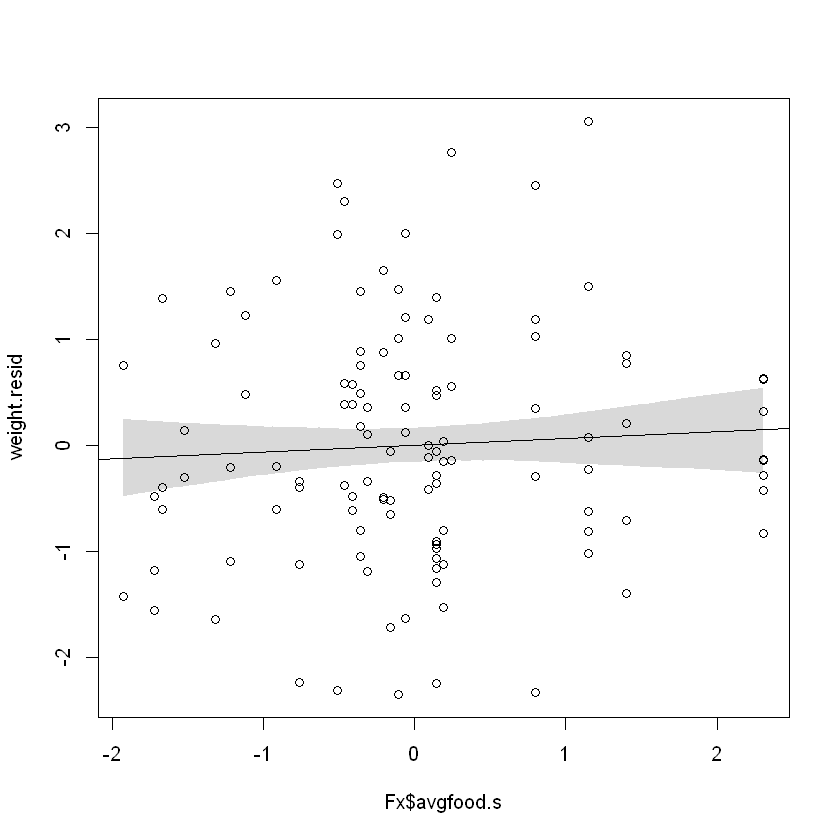

In [102]:
newvar<-map( 
    alist( 
        weigh.resid ~ dnorm( mu , sigma ),
        mu <- a + b*avgfood,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,  
        sigma ~ dunif( 0 , 50 ) ) ,
    data=data.frame(weigh.resid = weight.resid, avgfood=Fx$avgfood.s) )
plot( weight.resid ~ Fx$avgfood.s)
abline(lm( weight.resid ~ Fx$avgfood.s) )
newx<- seq(from=min(Fx$avgfood.s),to=max(Fx$avgfood.s), length.out=1e3)
mu.mu <-link(newvar, data=data.frame(avgfood=newx ))
shade(apply( mu.mu , 2, PI), newx)
#lines(Fx$avgfood.s,prd[,3],col="red",lty=2)

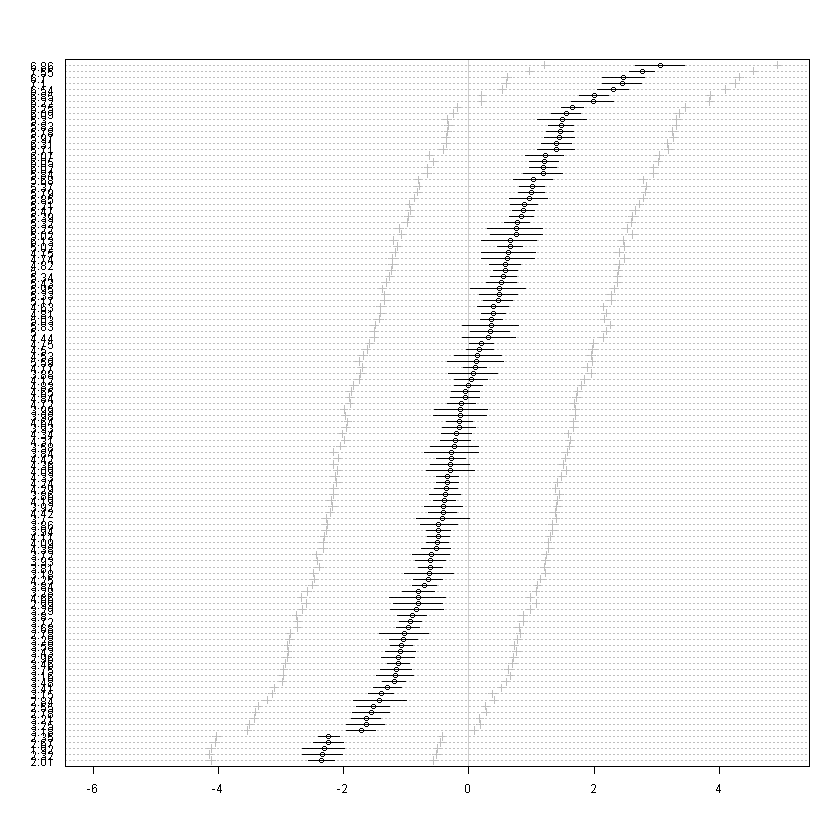

In [57]:
# compute residuals 
weight.resid <- Fx$weight - mu.mean
# get ordering by divorce rate 
o <- order(weight.resid) 
# make the plot 
dotchart( weight.resid[o] , labels=Fx$weight[o] , xlim=c(-6,5) , cex=0.6 )
abline( v=0 , col=col.alpha("black",0.2) )
for ( i in 1:nrow(Fx) ) { j <- o[i] 
# which State in order 
lines( Fx$weight[j]-c(mu.PI[1,j],mu.PI[2,j]) , rep(i,2) ) 
points( Fx$weight[j]-c(weight.PI3[1,j],weight.PI3[2,j]) , rep(i,2), pch=3 , cex=0.6 , col="gray" ) }


In [104]:
cor(Fx)

,group,avgfood,groupsize,area,weight,avgfood.s,groupsize.s,area.s,weight.s
group,1.0000000,0.34084493,0.4009594,0.37777286,-0.15190033,0.34084493,0.4009594,0.37777286,-0.15190033
avgfood,0.3408449,1.00000000,0.9014829,0.88310378,-0.02503892,1.00000000,0.9014829,0.88310378,-0.02503892
groupsize,0.4009594,0.90148290,1.0000000,0.82759448,-0.16099376,0.90148290,1.0000000,0.82759448,-0.16099376
area,0.3777729,0.88310378,0.8275945,1.00000000,0.01947728,0.88310378,0.8275945,1.00000000,0.01947728
weight,-0.1519003,-0.02503892,-0.1609938,0.01947728,1.00000000,-0.02503892,-0.1609938,0.01947728,1.00000000
avgfood.s,0.3408449,1.00000000,0.9014829,0.88310378,-0.02503892,1.00000000,0.9014829,0.88310378,-0.02503892
groupsize.s,0.4009594,0.90148290,1.0000000,0.82759448,-0.16099376,0.90148290,1.0000000,0.82759448,-0.16099376
area.s,0.3777729,0.88310378,0.8275945,1.00000000,0.01947728,0.88310378,0.8275945,1.00000000,0.01947728
weight.s,-0.1519003,-0.02503892,-0.1609938,0.01947728,1.00000000,-0.02503892,-0.1609938,0.01947728,1.00000000


In [105]:
#bodyweight as an additive function of avgfood and groupsize, and
MM.5.7 <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*avgfood.s +b1*groupsize.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ,b1=0) )

In [107]:
MM.5.7


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * avgfood.s + b1 * groupsize.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1 
 4.5296547  1.1166010  0.7581707 -0.8740034 

Log-likelihood: -177.39 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


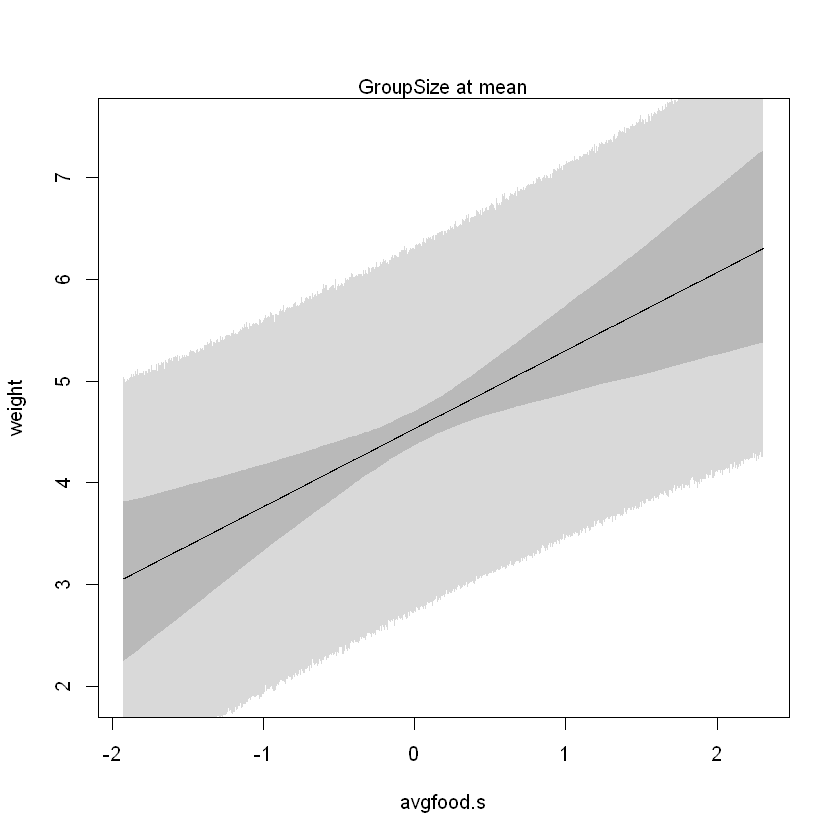

In [108]:
avgfood.seq<-seq(from=min(Fx$avgfood.s),to=max(Fx$avgfood.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi.5.7 <- link( MM.5.7 , data=data.frame(avgfood.s=avgfood.seq ,groupsize.s=mean(Fx$groupsize.s) ) )
#Draw Prediction Simulations from posterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi.5.7 <- sim( MM.5.7 , data=data.frame(avgfood.s=avgfood.seq ,groupsize.s=mean(Fx$groupsize.s)),n=1e4  ) 
#display
plot(weight ~ avgfood.s , Fx , type="n")
mtext("GroupSize at mean")
lines(avgfood.seq , apply(mu.multi.5.7, 2, mean))
shade(apply( mu.multi.5.7 , 2, PI) , avgfood.seq  )
shade(apply( sim.weight.Multi.5.7 , 2, PI) , avgfood.seq  )

In [109]:
#bodyweight as an additive function of avgfood and groupsize, and
MM.5.7.2 <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*avgfood.s +b1*groupsize.s + b2*area.s,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        b2 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ,b1=0) )

In [110]:
MM.5.7.2


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * avgfood.s + b1 * groupsize.s + b2 * area.s
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
b2 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1         b2 
 4.5296431  1.1043728  0.4966264 -0.9339365  0.3574099 

Log-likelihood: -176.11 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


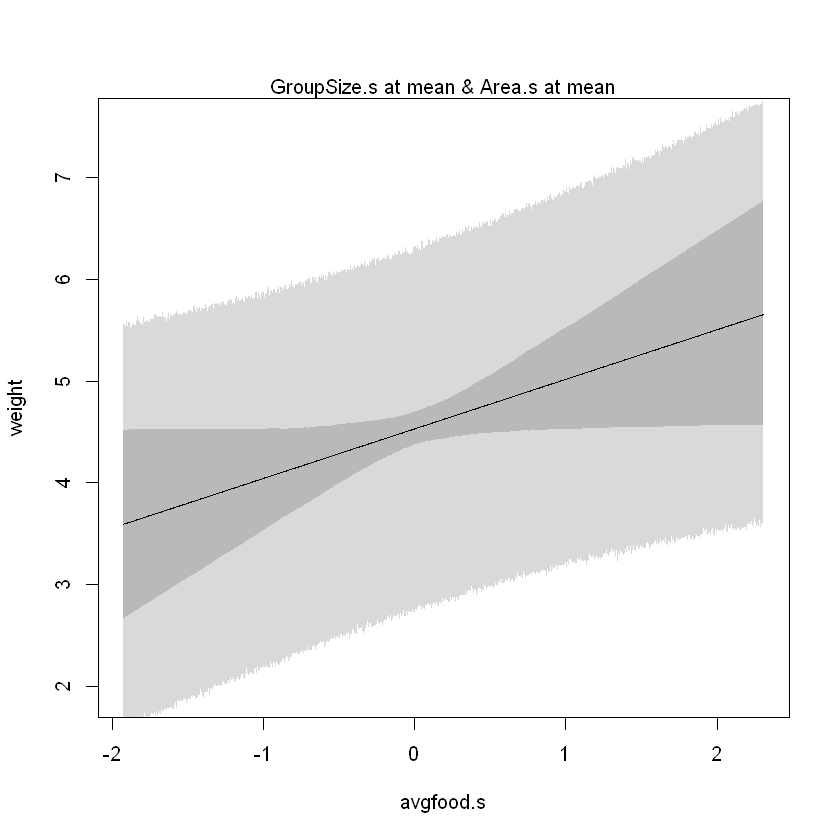

In [113]:
avgfood.seq<-seq(from=min(Fx$avgfood.s),to=max(Fx$avgfood.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi.5.7.2 <- link( MM.5.7.2 , data=data.frame(avgfood.s=avgfood.seq ,groupsize.s=mean(Fx$groupsize.s),
                                                  area.s = mean(Fx$area.s)) )
#Draw Prediction Simulations from posterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi.5.7.2 <- sim( MM.5.7.2 , data=data.frame(avgfood.s=avgfood.seq ,
                                                          groupsize.s=mean(Fx$groupsize.s),
                                                         area.s=mean(Fx$area.s)),n=1e4  ) 
#display
plot(weight ~ avgfood.s , Fx , type="n")
mtext("GroupSize.s at mean & Area.s at mean")
lines(avgfood.seq , apply(mu.multi.5.7.2, 2, mean))
shade(apply( mu.multi.5.7.2 , 2, PI) , avgfood.seq  )
shade(apply( sim.weight.Multi.5.7.2 , 2, PI) , avgfood.seq  )

In [111]:
#draw parameter samples from posterior using trained data
mu.from.source <- link(MM.5.7.2)

#summarize samples across cases
mu.mean <- apply( mu.from.source, 2 , mean)
mu.PI <- apply(mu.from.source, 2, PI)

#predict/simulate observations
weight.sim4 <- sim(MM.5.7.2, n= 1e4)
weight.PI4 <-apply(weight.sim4, 2, PI)

[ 1000 / 1000 ]
[ 10000 / 10000 ]


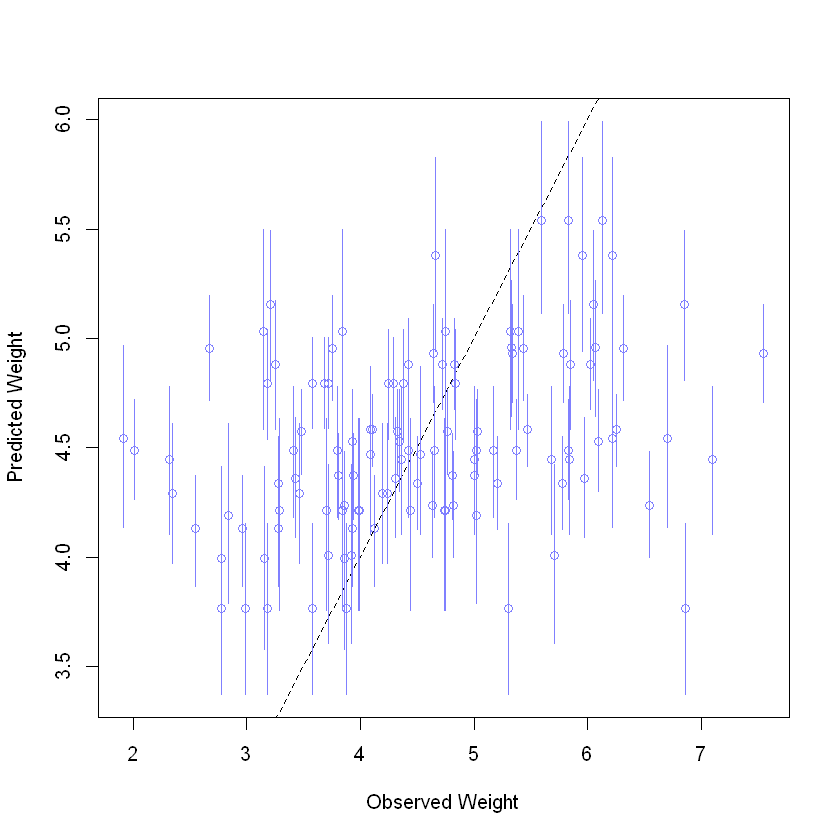

In [112]:
plot( mu.mean ~ Fx$weight , col=rangi2 , ylim=range(mu.PI) , xlab="Observed Weight" , ylab="Predicted Weight" )
abline( a=0 , b=1 , lty=2 )
for ( i in 1:nrow(Fx) ) 
    lines( rep(Fx$weight[i],2) , c(mu.PI[1,i],mu.PI[2,i]) ,
          col=rangi2 )

In [ ]:
area.seq<-seq(from=min(Fx$area.s),to=max(Fx$area.s), length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi2 <- link( MM.5.7.2 , data=data.frame(groupsize.s=mean(Fx$groupsize.s),area.s=area.seq ) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi2 <- sim( MM.5.7.2 , data=data.frame(groupsize.s=mean(Fx$groupsize.s), area.s=area.seq ),   n=1e4  ) 


Multi2.pi <- apply(sim.weight.Multi2 , 2 , PI)
#display
plot(weight~area.s, Fx , type="n")
mtext("groupsize at mean")
lines(area.seq , apply(mu.multi2, 2, mean))
shade(apply( mu.multi2 , 2, PI) , area.seq  )
shade(apply( sim.weight.Multi2 , 2, PI) , area.seq  )